# **Análise de Acidentes Fatais - São Paulo**
Neste projeto, iremos realizar uma análise exploratória dos dados referentes aos acidentes fatais nas rodovias no Estado de São Paulo.
 
## Importação dos Dados
Todos os dados usados nesta análise foram obtidos a partir do site [Respeito a vida](http://www.respeitoavida.sp.gov.br/relatorios//), que disponibiliza dados referentes aos acidentes de trânsito no Estado de São Paulo.
 
Para esta análise exploratória, será baixado apenas o seguinte arquivo:
- acidentes_fatais_rodovias.xlsx
 
Também importaremos as bibliotecas pandas e matplotlib, para possibilitar a manipulação e análise dos dados.


In [ ]:
# Importando as bibliotecas necessárias 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importando o dataset(planilha de excel)
df = pd.read_excel('acidentes_fatais_rodovias.xlsx')

# Análise Exploratória
Agora que já realizamos a importação dos dados e das bibliotecas, iremos explorar e examinar os dados contidos no DataFrame.


### Verificando Dados
E nesse primeiro momento, vamos olhar para nossa base de dados e realizar algumas verificações preliminares, a fim de descobrir com quais dados estamos lidando e seus respectivos tipos, o tamanho do nosso DataFrame e algumas estatísticas iniciais sobre os acidentes.


In [ ]:
# Verificando o tamanho do dataset
print("\nDIMENSÕES DO DATAFRAME:\n")
print(f"Linhas  =  {df.shape[0]}")
print(f"Colunas =  {df.shape[1]}")


DIMENSÕES DO DATAFRAME:

Linhas  =  13991
Colunas =  32


In [ ]:
# Exibindo as primeiras 5 linhas.
df.head()

,ID,Id Delegacia (RDO),Número BO (RDO),Ano BO (RDO),Data do Acidente,Dia do Acidente,Mês do Acidente,Ano do Acidente,Ano/Mês do Acidente,Dia da semana,Hora do Acidente,Turno,Município,Região Administrativa,Logradouro,Numeral / KM,Jurisdição,Administração,Conservação,Tipo do Local do Acidente,Lat (GEO),Long (GEO),Iluminação da via (SIOPM),Superfície da Via (SIOPM),Tipo de pista (SIOPM),Outro Veículo Envolvido,Tipo de via,Condições Climáticas (SIOPM),Sentido da Via (SIOPM),Limite da velocidade da via (SIOPM),Quantidade de vítimas,Tempo entre o Acidente e as Mortes
0,3074422,30111,1968,2021,2021-05-31,31,MAIO,2021,2021.05,SEGUNDA,05:15:00,MADRUGADA,DIADEMA,Metropolitana de São Paulo,SP 160,"21,0",ESTADUAL,CONCESSIONÁRIA-ARTESP,ECOVIAS,PUBLICO,"-23,715536774223285","-46,60484928376247",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,1,Até 30 dias
1,3074424,40010,802,2021,2021-05-31,31,MAIO,2021,2021.05,SEGUNDA,02:20:00,MADRUGADA,SANTOS,Baixada Santista,SP 055,"252,5",ESTADUAL,CONCESSIONÁRIA-ARTESP,ECOVIAS,PUBLICO,"-23,883785000388976","-46,31636802592616",NOITE (VIA NÃO ILUMINADA),MOLHADA,MULTIPLA,CAMINHAO,Rodovias,CHUVA,OESTE,Entre 80 e 89km/h,1,Até 30 dias
2,3074428,70014,2066,2021,2021-05-31,31,MAIO,2021,2021.05,SEGUNDA,NAO DISPONIVEL,NAO DISPONIVEL,CAMPINAS,Campinas,SP 065,"129,4",ESTADUAL,CONCESSIONÁRIA-ARTESP,ROTA DAS BANDEIRAS,PUBLICO,"-22,88374836538688","-47,01327507134027",LUZ SOLAR,SECA,MULTIPLA,NÃO HÁ,Rodovias,BOM,NORTE,Entre 80 e 89km/h,1,Até 30 dias
3,3074423,70931,2293,2021,2021-05-31,31,MAIO,2021,2021.05,SEGUNDA,18:56:00,NOITE,INDAIATUBA,Campinas,SP 075,"57,0",ESTADUAL,CONCESSIONÁRIA-ARTESP,COLINAS,PUBLICO,"-23,087738752168327","-47,18013578532558",NOITE (VIA NÃO ILUMINADA),SECA,MULTIPLA,MOTOCICLETA,Rodovias,BOM,SUL,Entre 60 e 69km/h,1,Até 30 dias
4,3074386,30210,1238,2021,2021-05-30,30,MAIO,2021,2021.05,DOMINGO,NAO DISPONIVEL,NAO DISPONIVEL,MAIRIPORA,Metropolitana de São Paulo,BR 381,"54,0",FEDERAL,CONCESSIONÁRIA-ANTT,AUTOPISTA FERNÃO DIAS,PUBLICO,"-23,246766174964133","-46,59368315881336",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,CAMINHAO,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,2,Até 30 dias


In [ ]:
# Exibindo as últimas 5 linhas.
df.tail()

,ID,Id Delegacia (RDO),Número BO (RDO),Ano BO (RDO),Data do Acidente,Dia do Acidente,Mês do Acidente,Ano do Acidente,Ano/Mês do Acidente,Dia da semana,Hora do Acidente,Turno,Município,Região Administrativa,Logradouro,Numeral / KM,Jurisdição,Administração,Conservação,Tipo do Local do Acidente,Lat (GEO),Long (GEO),Iluminação da via (SIOPM),Superfície da Via (SIOPM),Tipo de pista (SIOPM),Outro Veículo Envolvido,Tipo de via,Condições Climáticas (SIOPM),Sentido da Via (SIOPM),Limite da velocidade da via (SIOPM),Quantidade de vítimas,Tempo entre o Acidente e as Mortes
13986,3015050,30304,148,2015,2014-12-20,20,DEZEMBRO,2014,2014.12,SÁBADO,01:48:00,MADRUGADA,ITAQUAQUECETUBA,Metropolitana de São Paulo,SP 056,NAO DISPONIVEL,ESTADUAL,PREFEITURA,PREFEITURA,NAO DISPONIVEL,"-23,4727772909","-46,344344417",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NaN,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,1,Mais de 30 dias
13987,3024683,100121,3813,2014,2014-11-02,2,NOVEMBRO,2014,2014.11,DOMINGO,14:30:00,TARDE,IBITINGA,Central,SP 317,"11,0",ESTADUAL,DER,DR04 - Araraquara,PUBLICO,"-21,67262750000087","-48,838250000000244",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,1,Mais de 30 dias
13988,3022027,10356,7027,2014,2014-08-11,11,AGOSTO,2014,2014.08,SEGUNDA,07:30:00,MANHA,SAO PAULO,Metropolitana de São Paulo,SP 015,"10,1",MUNICIPAL,PREFEITURA,PREFEITURA,PUBLICO,"-23,60837447244091","-46,69746635642715",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,CAMINHAO,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,1,Mais de 30 dias
13989,3067808,10226,8186,2019,2013-12-24,24,DEZEMBRO,2013,2013.12,TERÇA,NAO DISPONIVEL,NAO DISPONIVEL,SAO PAULO,Metropolitana de São Paulo,SP 150,"9,9",ESTADUAL,CONCESSIONÁRIA-ARTESP,ECOVIAS,PUBLICO,"-23,616390980919462","-46,60160483523878",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,1,Mais de 30 dias
13990,3022013,70305,6481,2013,2013-09-21,21,SETEMBRO,2013,2013.09,SÁBADO,16:15:00,TARDE,CAMPINAS,Campinas,SP 075,"72,0",ESTADUAL,CONCESSIONÁRIA-ARTESP,COLINAS,PUBLICO,"-22,973927460620708","-47,102658247503804",NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,1,Mais de 30 dias


In [ ]:
# Verificando o tipo dos dados.
print("\nTIPOS DAS VARIÁVEIS:\n")
df.dtypes


TIPOS DAS VARIÁVEIS:



ID                                              int64
Id Delegacia (RDO)                              int64
Número BO (RDO)                                 int64
Ano BO (RDO)                                    int64
Data do Acidente                       datetime64[ns]
Dia do Acidente                                 int64
Mês do Acidente                                object
Ano do Acidente                                 int64
Ano/Mês do Acidente                           float64
Dia da semana                                  object
Hora do Acidente                               object
Turno                                          object
Município                                      object
Região Administrativa                          object
Logradouro                                     object
Numeral / KM                                   object
Jurisdição                                     object
Administração                                  object
Conservação                 

In [ ]:
# Exibindo um resumo estatístico dos dados de nosso dataframe
df.describe(include=['O'])

,Mês do Acidente,Dia da semana,Hora do Acidente,Turno,Município,Região Administrativa,Logradouro,Numeral / KM,Jurisdição,Administração,Conservação,Tipo do Local do Acidente,Lat (GEO),Long (GEO),Iluminação da via (SIOPM),Superfície da Via (SIOPM),Tipo de pista (SIOPM),Outro Veículo Envolvido,Tipo de via,Condições Climáticas (SIOPM),Sentido da Via (SIOPM),Limite da velocidade da via (SIOPM),Tempo entre o Acidente e as Mortes
count,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,13991,9844,13991,13991,13991,13991,13991
unique,12,7,1259,5,587,16,516,4316,4,6,41,3,12289,12284,6,5,4,9,1,4,8,11,2
top,MAIO,SÁBADO,NAO DISPONIVEL,NOITE,SAO PAULO,Campinas,BR 116,NAO DISPONIVEL,ESTADUAL,CONCESSIONÁRIA-ARTESP,AUTOBAN,PUBLICO,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Rodovias,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,Até 30 dias
freq,1391,2692,768,5408,638,2992,1223,1005,11827,6742,768,13723,295,295,10978,10978,10977,3789,13991,11011,10977,10977,13744


In [ ]:
# Verificando se existem números nulos(linhas em branco em nossas colunas)
df.isnull().sum()

ID                                        0
Id Delegacia (RDO)                        0
Número BO (RDO)                           0
Ano BO (RDO)                              0
Data do Acidente                          0
Dia do Acidente                           0
Mês do Acidente                           0
Ano do Acidente                           0
Ano/Mês do Acidente                       0
Dia da semana                             0
Hora do Acidente                          0
Turno                                     0
Município                                 0
Região Administrativa                     0
Logradouro                                0
Numeral / KM                              0
Jurisdição                                0
Administração                             0
Conservação                               0
Tipo do Local do Acidente                 0
Lat (GEO)                                 0
Long (GEO)                                0
Iluminação da via (SIOPM)       

### Tratando Dados
Após finalizar essa etapa inicial de amostragem dos dados, adquirimos um conhecimento prévio do nosso DataFrame e então podemos realizar algumas alterações que julgamos necessárias, como por exemplo, a exclusão de colunas que não utilizaremos, a fim de facilitar a visualização dos dados.


In [ ]:
# Copiando os dados do DataFrame para outra variavél, a fim de realizar as alterações nessa cópia
dados_acidentes = df

In [ ]:
# Excluindo as colunas que não são de nosso interesse.
dados_acidentes = dados_acidentes.drop(['ID','Id Delegacia (RDO)', 'Número BO (RDO)', 'Logradouro', 'Numeral / KM', 
                                        'Ano BO (RDO)', 'Hora do Acidente', 'Tipo de via', 'Tipo de pista (SIOPM)', 
                                        'Ano/Mês do Acidente', 'Sentido da Via (SIOPM)', 'Lat (GEO)', 'Long (GEO)'],axis=1)

In [ ]:
# Apresentando o tamanho do dataframe atualizado
print("\nDIMENSÕES DO DATAFRAME:\n")
print(f"Linhas  =  {dados_acidentes.shape[0]}")
print(f"Colunas =  {dados_acidentes.shape[1]}")


DIMENSÕES DO DATAFRAME:

Linhas  =  13991
Colunas =  19


### Visualização dos Dados
Agora que já executamos todas as etapas acima, podemos partir para a visualização dos nossos dados de forma mais direta.
 
Nessa etapa iremos visualizar por meio de gráficos as informações e então seremos capazes de encontrar alguns padrões nos acidentes. 


#### Mês
Começando nossos gráficos com o dado que mais me chamou a atenção, o mês de **Maio** foi o recordista em acidentes com vítimas fatais no Estado de São Paulo, de acordo com nossa base de dados.
 
Com 1391 ocorrências, ele o segundo colocado **Março** por 146 acidentes fatais.


MÊS DOS ACIDENTES:

MAIO         1391
MARÇO        1245
JULHO        1235
AGOSTO       1200
ABRIL        1198
DEZEMBRO     1178
SETEMBRO     1151
JANEIRO      1136
OUTUBRO      1108
JUNHO        1105
FEVEREIRO    1063
NOVEMBRO      981
Name: Mês do Acidente, dtype: int64




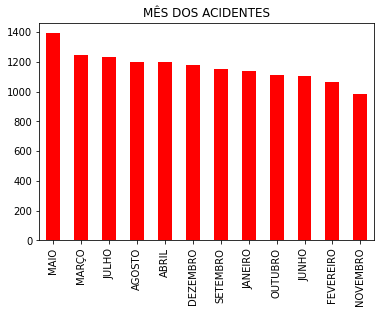

In [ ]:
# Mostrando o gráfico relativo aos meses dos acidentes
dados_acidentes['Mês do Acidente'].value_counts().plot.bar(title="MÊS DOS ACIDENTES", color="red");

# Mostrando o dados relativo aos meses dos acidentes
print(f"\nMÊS DOS ACIDENTES:\n\n{dados_acidentes['Mês do Acidente'].value_counts(ascending=False)}\n\n")

#### Turno
A noite é o turno que detém o maior número de acidentes, conforme os dados abaixo, ele representa cerca de 38% dos acidentes e quando incluímos a madrugada sobe para cerca de 58%.


TURNOS DOS ACIDENTES:

NOITE             5408
MADRUGADA         2845
TARDE             2710
MANHA             2260
NAO DISPONIVEL     768
Name: Turno, dtype: int64




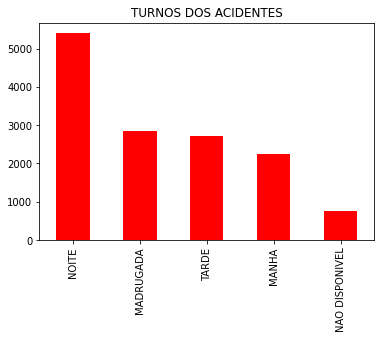

In [ ]:
# Mostrando o gráfico relativo aos turnos dos acidentes
dados_acidentes['Turno'].value_counts().plot.bar(title="TURNOS DOS ACIDENTES", color="red");

# Mostrando o dados relativo aos turnos dos acidentes
print(f"\nTURNOS DOS ACIDENTES:\n\n{dados_acidentes['Turno'].value_counts(ascending=False)}\n\n")

#### Dia da Semana
Outro dado interessante de se analisar são os dias da semana, através do gráfico abaixo, podemos ver que os finais de semana(sábado e domingo) são onde se concentram o maior número de acidentes com vítimas fatais no Estado de São Paulo. E podemos incluir a sexta-feira nesta lista, assim temos cerca de 52% dos casos concentrados nestes dias.


DIA DA SEMANA QUE OS ACIDENTES ACONTECERAM:

SÁBADO     2692
DOMINGO    2651
SEXTA      2058
QUINTA     1714
SEGUNDA    1698
QUARTA     1620
TERÇA      1558
Name: Dia da semana, dtype: int64




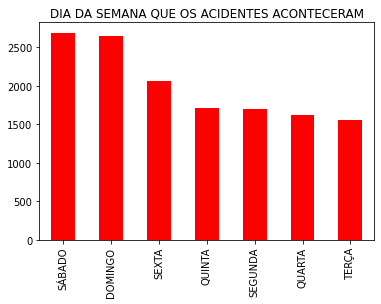

In [ ]:
# Mostrando o gráfico relativo aos dias dos acidentes
dados_acidentes['Dia da semana'].value_counts().plot.bar(title="DIA DA SEMANA QUE OS ACIDENTES ACONTECERAM", color="red");

# Mostrando o dados relativo aos dias dos acidentes
print(f"\nDIA DA SEMANA QUE OS ACIDENTES ACONTECERAM:\n\n{dados_acidentes['Dia da semana'].value_counts(ascending=False)}\n\n")

#### Velocidade Da Via
Mesmo com muitos **dados não disponíveis**, o que pode comprometer nossa análise, podemos verificar que a grande maioria dos dados informados ficam acima dos 80km/h, o que faz sentido, pelo fato de que, com essa velocidade as chances de uma fatalidade em um acidente são maiores.


VELOCIDADE DAS VIAS:

NAO DISPONIVEL        10977
Entre 90 e 100km/h      819
Mais que 100km/h        650
Entre 80 e 89km/h       620
Entre 60 e 69km/h       556
Entre 40 e 49km/h       222
Entre 50 e 59km/h        47
Menos de 10km/h          41
Entre 70 e 79km/h        31
Entre 30 e 39km/h        26
Entre 20 e 29km/h         2
Name: Limite da velocidade da via (SIOPM), dtype: int64




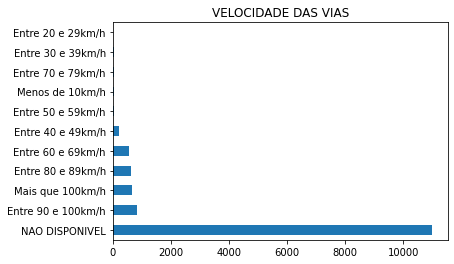

In [ ]:
# Mostrando o gráfico relativo a velocidade da via dos acidentes
dados_acidentes['Limite da velocidade da via (SIOPM)'].value_counts().plot.barh(title="VELOCIDADE DAS VIAS")

# Mostrando o dados relativo a velocidade da via dos acidentes
print(f"\nVELOCIDADE DAS VIAS:\n\n{dados_acidentes['Limite da velocidade da via (SIOPM)'].value_counts(ascending=False)}\n\n")

### Conclusão
Nesta análise exploratória realizamos apenas uma análise de forma superficial nos dados relacionados aos acidentes fatais no Estados de São Paulo, contudo, obtivemos uma boa noção sobre eles, como por exemplo, que o **turno** onde mais acontece acidentes com vítimas é a **noite**, que representam cerca de 38% dos números.
 
Outro ponto a se destacar, mesmo com muitos dados faltando e que podem distorcer nossa análise, é que a maioria dos acidentes fatais com a **velocidade da via** disponível, acontecem em rodovias com velocidade acima dos 80km/h.
 
Por fim, temos uma boa visão inicial sobre os dados, mas existe muito espaço para se aprofundar e revelar detalhes que possivelmente passem despercebidos.
